In [1]:
#import all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
import scipy.stats as sp
import paramiko
import csv
from io import StringIO
import scipy
from sklearn.ensemble import HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
import re
import os

In [2]:
#get the relative abundance for genus
rel_abb_genus = pd.read_csv('/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/Tot_Genera_Rel_ab_P1P2P3_NewClass.txt',
                            sep = '\t') 
rel_abb_genus = rel_abb_genus.transpose()

rel_abb_species = pd.read_csv('/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/Tot_Species_Rel_ab_P1P2P3_NewClass_gass.csv',
                             sep = '\t')

rel_abb_species = rel_abb_species.transpose()

def fix_spaces(string):
    list_of_words = string.split()
    complete_name = '.'.join(list_of_words)
    return complete_name

rel_abb_species.columns = list(pd.Series(rel_abb_species.columns).apply(fix_spaces))




In [3]:
rel_abb_genus.head()

,Lactobacillus,Bifidobacterium,Streptococcus,Fannyhessea,Prevotella,Escherichia,28L,Corynebacterium,Finegoldia,Anaerococcus,...,51-20,Parasutterella,Lysobacter_A,Mycoplasmopsis,Globicatella,Bergeyella,Longicatena,Filifactor,Williamwhitmania,Unclassified Unclassifed
X001_1,94.831365,3.781856,0.005845,0.0,0.005845,0.005845,0.0,0.005845,0.007307,0.004384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.228957
X001_2,97.955649,0.000795,0.071509,0.0,0.023042,0.000000,0.0,0.036549,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737659
X001_3,97.721344,0.039346,0.000855,0.0,0.001711,0.002566,0.0,0.006843,0.012830,0.013686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.886050
X001_4,98.524176,0.019711,0.003696,0.0,0.006160,0.002464,0.0,0.006160,0.006160,0.003696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.167847
X002_1,99.204598,0.008709,0.008709,0.0,0.015482,0.000000,0.0,0.069670,0.010644,0.026126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.478015


In [4]:
rel_abb_species.head()

,Lactobacillus.iners,Lactobacillus.crispatus,Lactobacillus.gasseri,Lactobacillus.jensenii,Bifidobacterium.Unclassified,Fannyhessea.Unclassified,Bifidobacterium.vaginale_H,Streptococcus.Unclassified,Streptococcus.agalactiae,Bifidobacterium.vaginale,...,Arcanobacterium_A.Unclassified,Bergeyella.Unclassified,Paraprevotella.xylaniphila,Deinococcus.geothermalis,Longicatena.Unclassified,Paraprevotella.Unclassified,Filifactor.Unclassified,Facklamia.Unclassified,Williamwhitmania.Unclassified,Unclassified.Unclassifed.Unclassifed
X001_1,0.021920,0.125672,0.001461,94.682312,0.623977,0.0,1.154431,0.001461,0.001461,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.228957
X001_2,0.009534,0.058001,0.000000,97.888113,0.000795,0.0,0.000000,0.054029,0.000795,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.737659
X001_3,0.055598,0.005132,0.002566,97.658048,0.018818,0.0,0.014541,0.000000,0.000855,0.0,...,0.0,0.0,0.0,0.004277,0.0,0.0,0.0,0.0,0.0,1.886050
X001_4,0.087465,0.013551,0.003696,98.419464,0.008623,0.0,0.006160,0.002464,0.001232,0.0,...,0.0,0.0,0.0,0.011087,0.0,0.0,0.0,0.0,0.0,1.167847
X002_1,35.653739,63.487963,0.058059,0.004838,0.007741,0.0,0.000968,0.005806,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.478015


In [5]:
#get the taxa that occurs more than 20% of the samples
right_genera = (((rel_abb_genus != 0).sum(axis = 0) / len(rel_abb_genus)) > 0.2)[(((rel_abb_genus != 0).sum(axis = 0) / len(rel_abb_genus)) > 0.2)].index
right_species = (((rel_abb_species != 0).sum(axis = 0) / len(rel_abb_species)) > 0.2)[(((rel_abb_species != 0).sum(axis = 0) / len(rel_abb_species)) > 0.2)].index

right_genera = list(right_genera)
rel_abb_genus = rel_abb_genus[right_genera]
right_species = list(right_species)
rel_abb_species = rel_abb_species[right_species]



right_genera = list(rel_abb_genus.apply(np.mean)[rel_abb_genus.apply(np.mean) > 0.1].index)
right_genera.append('Code')

right_species = list(rel_abb_species.apply(np.mean)[rel_abb_species.apply(np.mean) > 0.1].index)
right_species.append('Code')



In [6]:
removed_taxa_genus = []
i = 0
while i < len(right_genera):
    name = right_genera[i]
    if re.search('^Unclassified', name):
        removed_taxa_genus.append(right_genera.pop(i))
    else:
        i += 1  # Only increment if no element is removed

removed_taxa_species = []
i = 0
while i < len(right_species):
    name = right_species[i]
    if re.search('^Unclassified', name):
        removed_taxa_species.append(right_species.pop(i))
    else:
        i += 1  # Only increment if no element is removed

In [7]:
removed_taxa_genus

['Unclassified Unclassifed']

In [8]:
removed_taxa_species

['Unclassified.Unclassifed.Unclassifed']

In [9]:
#get the clr transformed data 
clr_genus = pd.read_csv('/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/clr_genus.csv')
clr_genus['Code'] = clr_genus['Unnamed: 0']
clr_genus = clr_genus.drop('Unnamed: 0',axis = 1)

clr_species = pd.read_csv('/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/clr_species.csv')
clr_species['Code'] = clr_species['Unnamed: 0']
clr_species = clr_species.drop('Unnamed: 0',axis = 1)

def fix_spaces(string):
    list_of_words = string.split()
    complete_name = '.'.join(list_of_words)
    return complete_name

clr_species.columns = list(pd.Series(clr_species.columns).apply(fix_spaces))


#delete the columns relative to the "rare" taxa 
clr_genus = clr_genus[right_genera]
clr_species = clr_species[right_species]


In [10]:
#get the lab data
df_lab = pd.read_csv('/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/Metadata_Qbit_libray_DNA_P1P2P3.csv',sep = ';')
df_lab['Code'] = df_lab['Sample_ID'].apply(lambda stringa: 'X' + stringa ) #make the column Code like in others dataframes
df_lab = df_lab.drop(['Sample_ID','Plate','Visit'], axis = 1)
df_lab.head()

#get the counts data
df_count = pd.read_csv('~/Downloads/ASV_taxa_unclassified_2024-10-07.csv', sep = '\t').drop('Row.names',axis = 1)

In [11]:
list(df_count[df_count.columns[8::]].sum().index) == list(df_lab.Code.values)

True

In [12]:
df_lab['Total_count'] = df_count[df_count.columns[8::]].sum().values/10000
df_lab['Total_count'] = df_lab['Total_count'].apply(lambda x: round(x))

In [13]:
df_lab.head()

,Qubit_DNA,Qubit_Library,Code,Total_count
0,8.9,8.4,X001_1,7
1,19.8,71.7,X001_2,13
2,15.4,75.1,X001_3,12
3,12.0,74.6,X001_4,8
4,7.8,44.7,X002_1,10


In [14]:
#define a function to check the significant correlation between the technical variables and bacteria
def check_corr_tec(num,abb,choice):
    dic_res = {'Qubit_DNA' : [],'Qubit_Library' : [], 'Total_count' : []}

    if choice == 'genera':
    
        for col in ['Qubit_DNA','Qubit_Library', 'Total_count']:
            data = pd.DataFrame(columns = ['Bacterium','Variable','p-value'],index = range(0,len(right_genera)))
            i = 0
            for batt in right_genera[0:(len(right_genera)-1)]:
                df = pd.merge(abb,df_lab,on = 'Code')
                res_rho, res_pvalue = sp.spearmanr(df[batt], df[col])
                data.loc[i, 'Bacterium'] = batt
                data.loc[i, 'Variable'] = col
                data.loc[i, 'Rho'] = res_rho
                data.loc[i, 'p-value'] = res_pvalue
            dic_res[col] = data
            
        if num == 1:
            return dic_res['Qubit_DNA'][dic_res['Qubit_DNA']['p-value'] < 0.05]
        else:
            return dic_res['Qubit_Library'][dic_res['Qubit_Library']['p-value'] < 0.05]
    else:

        for col in ['Qubit_DNA','Qubit_Library', 'Total_count']:
            data = pd.DataFrame(columns = ['Bacterium','Variable','Rho','p-value'],index = range(0,len(right_genera)))
            i = 0
            for batt in right_species[0:(len(right_species)-1)]:
                df = pd.merge(abb,df_lab,on = 'Code')
                res_rho, res_pvalue = sp.spearmanr(df[batt], df[col])
                data.loc[i, 'Bacterium'] = batt
                data.loc[i, 'Variable'] = col
                data.loc[i, 'Rho'] = res_rho
                data.loc[i, 'p-value'] = res_pvalue
                i = i + 1
            dic_res[col] = data
            
        if num == 1:
            return dic_res['Qubit_DNA']
        elif num == 2:
            return dic_res['Qubit_Library']
        else:
            return dic_res['Total_count']

    

In [15]:
df1 = check_corr_tec(1,clr_species,choice = 'species')
df2 = check_corr_tec(2,clr_species,choice = 'species')
df3 = check_corr_tec(3,clr_species,choice = 'species')
df = pd.concat([df1,df2,df3])
df.Rho = df.Rho.apply(lambda s: float(s))
df.head(100)

,Bacterium,Variable,Rho,p-value
0,Lactobacillus.iners,Qubit_DNA,0.007566,0.912798
1,Lactobacillus.crispatus,Qubit_DNA,0.153106,0.025798
2,Lactobacillus.gasseri,Qubit_DNA,-0.280369,0.000035
3,Lactobacillus.jensenii,Qubit_DNA,0.073216,0.288613
4,Bifidobacterium.Unclassified,Qubit_DNA,-0.139116,0.043028
...,...,...,...,...
25,Staphylococcus.Unclassified,Total_count,-0.214209,0.001707
26,Prevotella.disiens,Total_count,-0.155686,0.023374
27,Dialister_B.micraerophilus,Total_count,-0.137408,0.045679
28,Corynebacterium.lactis_A,Total_count,-0.151498,0.027416


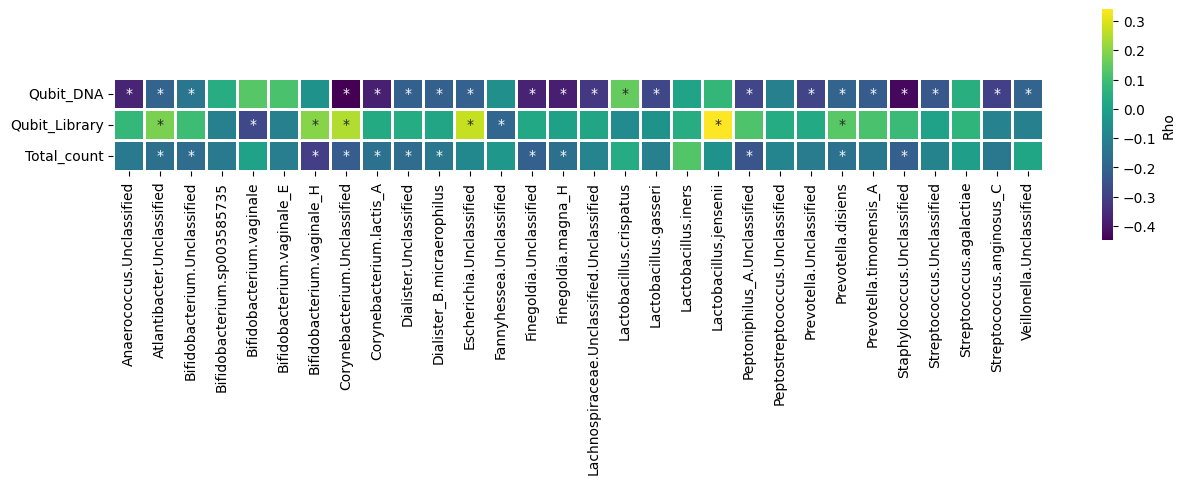

In [16]:
# Create a new column for annotations: '*' if p-value < 0.05, otherwise empty string
df['Annotation'] = np.where(df['p-value'] < 0.05, '*', '')

# Pivot the data for the heatmap (Rho values for coloring, Annotation for asterisks)
heatmap_data = df.pivot(index="Variable", columns="Bacterium", values="Rho").astype(float)  # Ensure Rho is float
annotations = df.pivot(index="Variable", columns="Bacterium", values="Annotation")

# Increase figure size to make squares bigger
plt.figure(figsize=(15, 10))  # You can adjust this size for bigger or smaller squares

# Create the heatmap with Rho values for the color and annotations for the '*' marks
sns.heatmap(
    heatmap_data, 
    cmap="viridis",  # Color palette for Rho values
    annot=annotations,  # Annotations will show '*' for significant values
    fmt='',  # No specific formatting needed for the annotations
    cbar_kws={'label': 'Rho','shrink': 0.3},  # Add a colorbar with label
    linewidths=1,  # Add space between squares for clearer distinction
    square=True  # Ensures the cells are square-shaped
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.xlabel(xlabel = '')
plt.ylabel(ylabel = '')

# Show the plot
plt.show()

In [17]:
df_lab

,Qubit_DNA,Qubit_Library,Code,Total_count
0,8.9,8.4,X001_1,7
1,19.8,71.7,X001_2,13
2,15.4,75.1,X001_3,12
3,12.0,74.6,X001_4,8
4,7.8,44.7,X002_1,10
...,...,...,...,...
207,24.3,42.0,X091_4,9
208,3.1,73.0,X092_1,9
209,7.7,17.0,X092_2,7
210,2.6,39.0,X092_3,8


<Axes: >

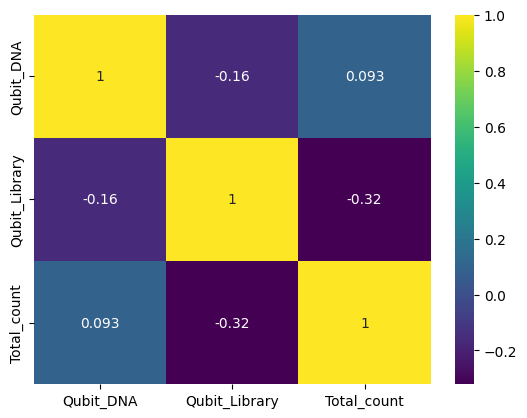

In [18]:
sns.heatmap(df_lab.drop('Code', axis = 1).corr(),cmap = 'viridis',annot=True)

In [19]:
#import data form server

# Define the connection parameters
hostname = "192.168.131.191"
username = "fabio.chillotti"
password = '********'
file_path = '/home/res-fellows/fabio.chillotti/cleaned_data/cleaned_questionnaire.csv'

# Initialize the SSH client
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())

try:
    # Connect to the server
    ssh.connect(hostname, username=username, password=password)
    
    # Execute the command to read the file
    stdin, stdout, stderr = ssh.exec_command(f"cat {file_path}")
    csv_data = stdout.read().decode('utf-8')
    
    # Convert the CSV data into a pandas DataFrame
    quest = pd.read_csv(StringIO(csv_data), 
                        quoting=csv.QUOTE_MINIMAL,
                        skip_blank_lines=True,
                        on_bad_lines='skip')  # Skip lines with bad fields

finally:
    # Disconnect from the server
    ssh.close()

# Filter the necessary columns
f = open("/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/independence_significant_variables.txt", "r")

quest = quest[[el.split('\n')[0] for el in f.readlines()] + ['Code']]

# Display the filtered DataFrame
quest.head()

,Pregnancy_category,Swab_morning_or_not,Swab_after_feces,Med_or_supp_check,Bristol_stool_scale,Code
0,No,NaN,NaN,NaN,NaN,X001_0
1,No,not_morning,No,Yes,Normal stools,X001_1
2,No,not_morning,No,No,Normal stools,X001_2
3,No,not_morning,No,No,Normal stools,X001_3
4,No,not_morning,No,No,Normal stools,X001_4


# SINGLE COVARIATE #

In [20]:
quest

,Pregnancy_category,Swab_morning_or_not,Swab_after_feces,Med_or_supp_check,Bristol_stool_scale,Code
0,No,NaN,NaN,NaN,NaN,X001_0
1,No,not_morning,No,Yes,Normal stools,X001_1
2,No,not_morning,No,No,Normal stools,X001_2
3,No,not_morning,No,No,Normal stools,X001_3
4,No,not_morning,No,No,Normal stools,X001_4
...,...,...,...,...,...,...
374,No,NaN,NaN,NaN,NaN,X111_0
375,Yes,NaN,NaN,NaN,NaN,X112_0
376,No,NaN,NaN,NaN,NaN,X113_0
377,Yes,NaN,NaN,NaN,NaN,X114_0


In [63]:
#GRADIENT BOOSTING REGRESSOR ADJUSTED

#variables to take in account (all columns except Code)
f = open("/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/independence_significant_variables.txt", "r")
variables = [el.split('\n')[0] for el in f.readlines()]

covariate_abbreviations = {
    'Age_category': 'Age',
    'Pregnancy_category': 'Preg',
    'Swab_morning_or_not': 'SwabMorn',
    'Swab_after_feces': 'SwabAfter',
    'WHR_ranges': 'WHR',
    'Bristol_stool_scale': 'Bristol',
    'Med_or_supp_check': 'M_S_check'
    }

def prepare_data(batt, covariates, df_lab, choice = 'genus'):
    
    # Define the internal variable set for later use
    intern_variables = set(variables)  # Create a copy for set operations

    # Merge the necessary dataframes
    if choice == 'genus':
        df = pd.merge(df_lab, clr_genus[['Code', batt]], on='Code')
    else:
        df = pd.merge(df_lab, clr_species[['Code', batt]], on='Code')
        
    df = pd.merge(df, quest, on='Code')
    
    # Handle the covariates selection logic
    if covariates == 'all':
        to_remove = set()  # Nothing to remove
    elif covariates == 'lab':
        to_remove = intern_variables  # Remove everything from covariates
    else:
        to_remove = intern_variables.difference(covariates)  # Remove covariates not in the input set

    to_remove = to_remove.intersection(set(quest.columns))
    df = df.drop(list(to_remove), axis=1)
        
    # Define categorical features based on covariates
    if covariates == 'lab':
        cat_features = None  # No categorical features
    elif covariates == 'all':
        cat_features = variables  # Use all variables as categorical features
    else:
        cat_features = list(covariates)  # Use selected covariates

    return [df, cat_features]

In [113]:
def resid_boost_correction_genus(covariates,save = True, num = '',df_lab = df_lab,random_state = 101):
    dic_genus_batt_complete = {batt : [] for batt in clr_genus.drop('Code',axis = 1).columns} #dictionary to store the results
    importances_genus_dict = {batt: [] for batt in clr_genus.drop('Code', axis=1).columns}
    i = 0
    for batt in clr_genus.drop('Code',axis = 1).columns: #for loop to check every bacterium (genus)

        df = prepare_data(batt,covariates,df_lab,choice = 'genus')[0]
        cat_features = prepare_data(batt,covariates,df_lab,choice = 'genus')[1]

        base_model = HistGradientBoostingRegressor(random_state=random_state,categorical_features = cat_features)
            
        X = df.drop(['Code',batt], axis = 1)
        y = df[batt]
        if i == 0: 
            print(X.columns) 
            i = 1
        else: 
            pass
        base_model.fit(X,y)
        pred = base_model.predict(X)
        residual = y - pred
        dic_genus_batt_complete[batt] = residual            
        # Calculate permutation importance
        result = permutation_importance(base_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        # Get importance scores
        importances = result.importances_mean
        importances_genus_dict[batt] = importances 

    #make a dataframe with results (genus)
    adjusted_genus_complete_boost = pd.DataFrame({batt : dic_genus_batt_complete[batt] for batt in clr_genus.drop('Code',axis = 1).columns})
    adjusted_genus_complete_boost['Code'] = df['Code']
    imp_genus = pd.DataFrame({batt : importances_genus_dict[batt] for batt in clr_genus.drop('Code',axis = 1).columns})
    imp_genus.index = X.columns
    
    if save:
        if covariates == 'all':
            path_to_save_genus = '/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/complete_genus_adjusted_boost.csv' 
        else:
            #Get the shortened names for the selected covariates
            short_covariates = [covariate_abbreviations[cov] for cov in covariates if cov in covariate_abbreviations.keys()]
            name_file_genus = str(num) + '.complete_genus_adjusted_boost_' + '_'.join(short_covariates) + '.csv'
            path_to_save_genus = '/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/corrected_clr/genus/' + name_file_genus
        print(path_to_save_genus)
        adjusted_genus_complete_boost.to_csv(path_to_save_genus,sep = ',')

    return([adjusted_genus_complete_boost,imp_genus])

In [114]:
def resid_boost_correction_species(covariates,save = True, num = '',df_lab = df_lab,random_state = 101):

    dic_species_batt_complete = {batt : [] for batt in clr_species.drop('Code',axis = 1).columns} #dictionary to store the results
    importances_species_dict = {batt: [] for batt in clr_species.drop('Code', axis=1).columns}
    i = 0
    for batt in clr_species.drop('Code',axis = 1).columns: #for loop to check every bacterium (genus)

        df = prepare_data(batt,covariates,df_lab,choice = 'species')[0]
        cat_features = prepare_data(batt,covariates,df_lab,choice = 'species')[1]

        base_model = HistGradientBoostingRegressor(random_state=random_state,categorical_features = cat_features)
            
        X = df.drop(['Code',batt], axis = 1)
        y = df[batt]
        if i == 0: 
            print(X.columns) 
            i = 1
        else: 
            pass        
        base_model.fit(X,y)
        pred = base_model.predict(X)
        residual = y - pred
        dic_species_batt_complete[batt] = residual            
        # Calculate permutation importance
        result = permutation_importance(base_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        # Get importance scores
        importances = result.importances_mean
        importances_species_dict[batt] = importances 

    #make a dataframe with results (genus)
    adjusted_species_complete_boost = pd.DataFrame({batt : dic_species_batt_complete[batt] for batt in clr_species.drop('Code',axis = 1).columns})
    adjusted_species_complete_boost['Code'] = df['Code']
    imp_species = pd.DataFrame({batt : importances_species_dict[batt] for batt in clr_species.drop('Code',axis = 1).columns})
    imp_species.index = X.columns
    
    if save:
        if covariates == 'all':
            path_to_save_species = '/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/complete_species_adjusted_boost.csv' 
        else:
            #Get the shortened names for the selected covariates
            short_covariates = [covariate_abbreviations[cov] for cov in covariates if cov in covariate_abbreviations.keys()]
            name_file_species = str(num) + '.complete_species_adjusted_boost_' + '_'.join(short_covariates) + '.csv'
            path_to_save_species = '/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/corrected_clr/species/' + name_file_species
        adjusted_species_complete_boost.to_csv(path_to_save_species,sep = ',')

    return([adjusted_species_complete_boost,imp_species])

In [119]:
def complete_boost_correction(covariates,df_lab = df_lab,choice = 'genus',save = False,random_state = 101,num = ''):
    if choice == 'genus':
        return(resid_boost_correction_genus(covariates, save = save,random_state = random_state,num = num,df_lab = df_lab))
    elif choice == {'genus','species'}:
        res_genus = resid_boost_correction_genus(covariates, save = save,random_state = random_state, num = num,df_lab = df_lab)
        res_species = resid_boost_correction_species(covariates, save = save,random_state = random_state,num = num, df_lab = df_lab)
        return([
                res_genus[0], #data
                res_genus[1], #imp
                res_species[0], #data
                res_species[1] #imp
               ]
              )
    elif choice =='species':
        return(resid_boost_correction_species(covariates, save = save,random_state = random_state,num = num,df_lab = df_lab))


In [122]:
#run the function adding covariates one by one
j = 1
for cov in ['lab']+[set(variables[:i]) for i in range(1,len(variables) + 1)]:
    complete_boost_correction(cov, num = j,random_state=0,choice = {'genus','species'},save = True,df_lab = df_lab[['Code','Qubit_DNA']])
    j = j + 1
    
complete_boost_correction(covariates = 'all')

Index(['Qubit_DNA'], dtype='object')
/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/corrected_clr/genus/1.complete_genus_adjusted_boost_.csv
Index(['Qubit_DNA'], dtype='object')
Index(['Qubit_DNA', 'Pregnancy_category'], dtype='object')
/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/corrected_clr/genus/2.complete_genus_adjusted_boost_Preg.csv
Index(['Qubit_DNA', 'Pregnancy_category'], dtype='object')
Index(['Qubit_DNA', 'Pregnancy_category', 'Swab_morning_or_not'], dtype='object')
/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/corrected_clr/genus/3.complete_genus_adjusted_boost_Preg_SwabMorn.csv
Index(['Qubit_DNA', 'Pregnancy_category', 'Swab_morning_or_not'], dtype='object')
Index(['Qubit_DNA', 'Pregnancy_category', 'Swab_morning_or_not',
       'Swab_after_feces'],
      dtype='object')
/Users/fabiochillotti/Desktop/P1P2P3/new_classification/nuove_considerazioni/data/corrected_clr

[     Lactobacillus  Bifidobacterium  Streptococcus  Fannyhessea  Prevotella  \
 0         0.592931         0.619522      -0.133142    -0.938137   -0.008672   
 1         0.031182         0.175532      -0.210363     0.039739   -0.107943   
 2        -0.042803         0.523533      -0.232855    -0.142272    0.091308   
 3         0.165139         0.480117      -0.247367    -0.203345   -0.041855   
 4         0.522417        -0.452680      -0.105377     0.106302   -0.091447   
 ..             ...              ...            ...          ...         ...   
 207      -0.466728         1.574065      -0.070739    -0.094243   -0.076529   
 208       0.026893         1.424621      -0.317817     0.284923   -0.231006   
 209      -0.125264         1.112750      -0.480694    -0.459180   -0.636987   
 210       0.222240         0.820658      -0.438370     0.059968   -0.768950   
 211       0.081329        -1.161268       0.507671    -0.391310    0.972495   
 
      Escherichia  Corynebacterium  Fi

In [101]:
#check all checks
for cov in [['lab']] + [variables[:i] for i in range(1, len(variables) + 1)]:
    print(cov)

['lab']
['Pregnancy_category']
['Pregnancy_category', 'Swab_morning_or_not']
['Pregnancy_category', 'Swab_morning_or_not', 'Swab_after_feces']
['Pregnancy_category', 'Swab_morning_or_not', 'Swab_after_feces', 'Med_or_supp_check']
['Pregnancy_category', 'Swab_morning_or_not', 'Swab_after_feces', 'Med_or_supp_check', 'Bristol_stool_scale']


In [ ]:
fig, axes = plt.subplots(ncols = 2, dpi = 200)
sns.barplot(data = pd.melt(res[1],id_vars = 'Feature'), x = 'variable', y = 'value', hue = 'Feature', ax = axes[0])
sns.barplot(data = pd.melt(res[3],id_vars = 'Feature'), x = 'variable', y = 'value', hue = 'Feature', ax = axes[1])

axes[0].tick_params(axis='x', rotation=90,labelsize = 5)  # Rotate x-ticks for better visibility
axes[0].legend(title='', loc='upper left', fontsize=4, ncol=1)
axes[0].set_xlabel('Bacteria',fontsize=8)  # Adjust the fontsize as needed
axes[0].set_ylabel('Importance',fontsize=8)  # Adjust the fontsize as needed


axes[1].tick_params(axis='x', rotation=90,labelsize = 5)  # Rotate x-ticks for better visibility
axes[1].legend(title='', loc='upper left', fontsize=4, ncol=1)
axes[1].set_xlabel('Bacteria',fontsize=8)  # Adjust the fontsize as needed
axes[1].set_ylabel('Importance',fontsize=8)  # Adjust the fontsize as needed


plt.tight_layout()

plt.savefig('/Users/fabiochillotti/Desktop/to_see_most_important_features.jpg', dpi = 300)
plt.show()
